In [2]:
import ROOT

def init():
    ROOT.gInterpreter.Declare("""
        #ifndef _define_mass_2_
        #define _define_mass_2_        
        #include "Math/GenVector/LorentzVector.h"
        #include "Math/GenVector/PtEtaPhiM4D.h"
        #include "ROOT/RVec.hxx"

        float mass2(float pt1, float eta1, float phi1, float pt2, float eta2, float phi2) {
            typedef ROOT::Math::LorentzVector<ROOT::Math::PtEtaPhiM4D<double> > PtEtaPhiMVector;
            PtEtaPhiMVector p41(pt1, eta1, phi1, 0.10566);
            PtEtaPhiMVector p42(pt2, eta2, phi2, 0.10566);
            return (p41 + p42).M();
        }

        ROOT::RVecI diMuonPair_OS(const ROOT::RVecF & pt, const ROOT::RVecI & charge, const ROOT::RVecI & good) {
            ROOT::RVecI ret;
            float sumpt = -1;
            for (unsigned int i1 = 0, n = good.size(); i1 < n; ++i1) {
                if (!good[i1]) continue;
                for (unsigned int i2 = i1+1; i2 < n; ++i2) {
                    if (!good[i2]) continue;
                    if (charge[i1] != charge[i2]) {
                        if (pt[i1] + pt[i2] > sumpt) {
                           ret.resize(2);
                           ret[0] = i1;
                           ret[1] = i2;
                           sumpt = pt[i1] + pt[i2];
                        }
                    }
                }
            }
            return ret;
        }
        
        #endif
        """)
def defineAnalysis(rdf):
    rdf = rdf.Filter("nMuon >= 2")
    rdf = rdf.Define("Muon_good", "Muon_pt > 2 && Muon_looseId")
    rdf = rdf.Filter("Sum(Muon_good && Muon_charge > 0) >= 1 && Sum(Muon_good && Muon_charge < 0) >= 1")
    rdf = rdf.Define("DiMuonOS", "diMuonPair_OS(Muon_pt, Muon_charge, Muon_good)")
    rdf = rdf.Filter("!DiMuonOS.empty()")
    rdf = rdf.Define("muPt1", "Muon_pt[DiMuonOS[0]]")
    rdf = rdf.Define("muPt2", "Muon_pt[DiMuonOS[1]]")
    rdf = rdf.Define("muAbsEta1", "abs(Muon_pt[DiMuonOS[0]])")
    rdf = rdf.Define("muAbsEta2", "abs(Muon_pt[DiMuonOS[1]])")
    rdf = rdf.Define("mMuMu", "mass2(Muon_pt[DiMuonOS[0]], Muon_eta[DiMuonOS[0]], Muon_phi[DiMuonOS[0]], Muon_pt[DiMuonOS[1]], Muon_eta[DiMuonOS[1]], Muon_phi[DiMuonOS[1]])")
    return rdf

def definePlots(rdf):
    return [ 
        rdf.Histo1D(("pt1", "pt1", 100, 0., 40.), "muPt1"),
        rdf.Histo1D(("pt2", "pt2", 100, 0., 25.), "muPt2"),
        rdf.Histo1D(("eta1", "eta1", 56, 0., 2.8), "muAbsEta1"),
        rdf.Histo1D(("eta2", "eta2", 56, 0., 2.8), "muAbsEta2"),
        rdf.Histo1D(("mass_lo", "mass", 100, 0., 20.), "mMuMu"), 
        rdf.Histo1D(("mass_hi", "mass", 100, 0., 200.), "mMuMu") 
    ]

Welcome to JupyROOT 6.26/08


In [ ]:
rdf = ROOT.RDataFrame("Events", "root://eoscms.cern.ch//eos/cms/store/cmst3/group/tthlep/rdftests/SingleMuon_Run2018D_UL2018_MiniAODv2_NanoAODv9.root")
init()
proc_rdf = defineAnalysis(rdf)
histos = definePlots(proc_rdf)
ROOT.RDF.RunGraphs(histos)

canvases = []
for item in histos:
    histo = item.GetValue()
    c1 = ROOT.TCanvas("c1_"+histo.GetName(), "c1_"+histo.GetName())
    histo.Draw()
    c1.Draw()
    canvases.append(c1)

In [3]:
files = """
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/03d62eda-3f39-4ed9-8359-6d0c137f42aa.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/03f35c15-a213-4f1b-a0f8-1c577e0398ef.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/059dd622-9005-4e6c-a7d7-c5cc2918197e.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/064f41e7-7a2a-4040-a41c-a3ac84b4dfb4.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/152ba91a-8bfd-4dc2-af4b-a0f2287a53e0.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/161ed169-e7c4-44cd-b352-6e7c1b2b60e3.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/28898e6c-626a-4ff1-a24a-9e3043c294b4.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/3601ac91-a88a-4cbf-a055-ee3859910d7e.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/462a2ee0-3024-455a-b61e-f3d445dac30b.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/4b47d504-779a-4349-9e02-1dbe0a08d852.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/61ad5670-9fae-4ddd-9f18-854795817a19.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/63197747-fc27-470d-826a-bcfc0e074423.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/682f6932-00db-49b6-bc97-67d6210aa4c7.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/699ba09e-80b2-4959-b56a-7ec03b6fa8a9.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/74e1d986-a05c-49ae-b846-c3dde92bffe1.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/80605ddb-aff9-48da-89cf-5d27cc784c2d.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/8b7ea600-b369-4033-8915-35eb7ed424ff.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/8eacda1d-f4c9-42bb-a0a6-380892c685f5.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/9ebb6aa5-75ff-44e3-802c-0fb6302af184.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/a105a75c-bd82-4535-88a7-472aef874b6d.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/ab23fce6-2511-44ec-bb5e-3f65700f5c23.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/ad562534-d9fb-4591-81ce-2f3bb8242e3f.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/c00d55e3-3b5d-472e-a355-7ec2069bac18.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/d17053cc-acc4-4b28-95e7-656f8073fec1.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/d572cfc9-9a26-4911-ac64-731887651e7b.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/d738b91f-4e14-4ba6-b1a6-020e8cce72c6.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/e6eb581d-9de3-4744-b430-3dc1babc7011.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/e8d6d586-512c-4caa-abbe-1cb8e621b62e.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/ea90d30d-d5f3-40fb-9134-82d891823bc1.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/ebc30b3b-9b27-4d30-9555-bad363d4bb72.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/fd47c817-925f-4123-8b56-b94f21e5bef7.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/50000/ff680584-ac56-4a5f-a7de-a705bef29c52.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/60000/1a2776fd-296b-4331-ae4a-f4391bc32dca.root
/store/data/Run2022E/ZeroBias/NANOAOD/ReRecoNanoAODv11-v1/610000/5bffb856-6abb-453c-b562-26c838a3d1d5.root
""".strip().split()

Selected 1847 events out of 2020899


Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


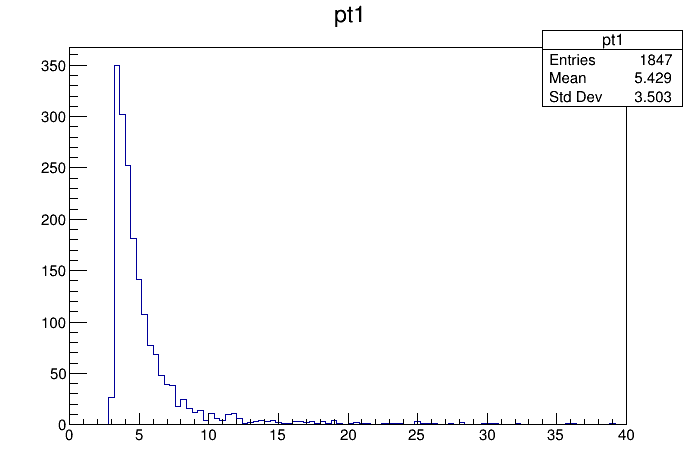

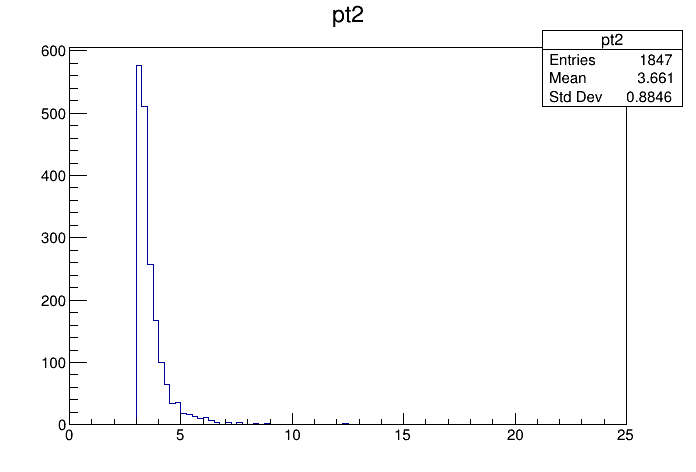

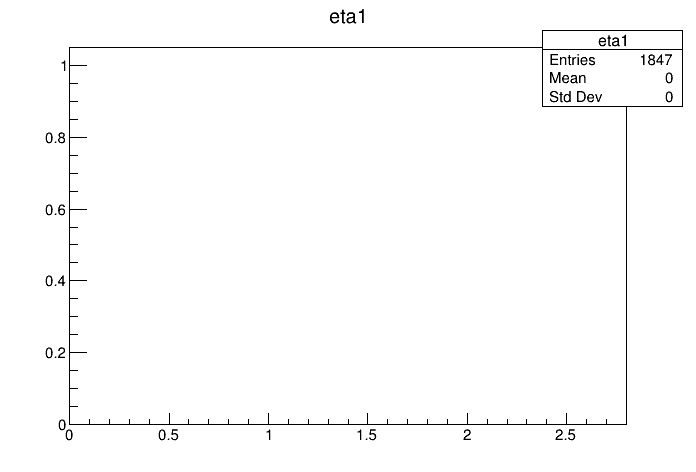

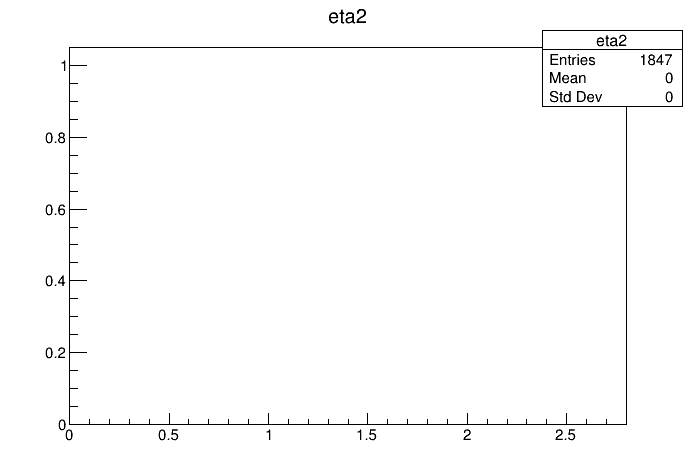

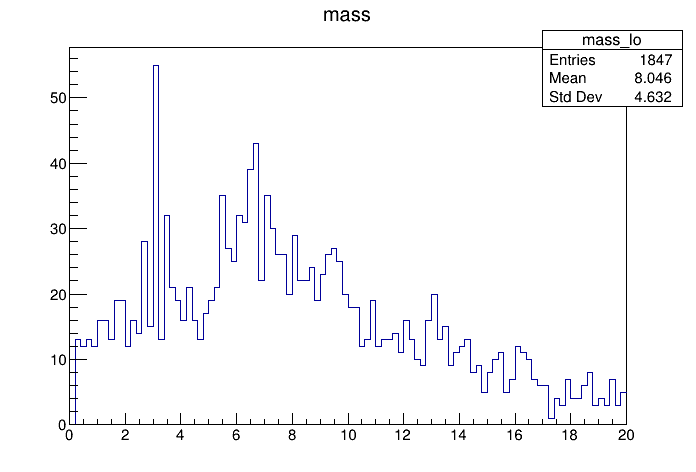

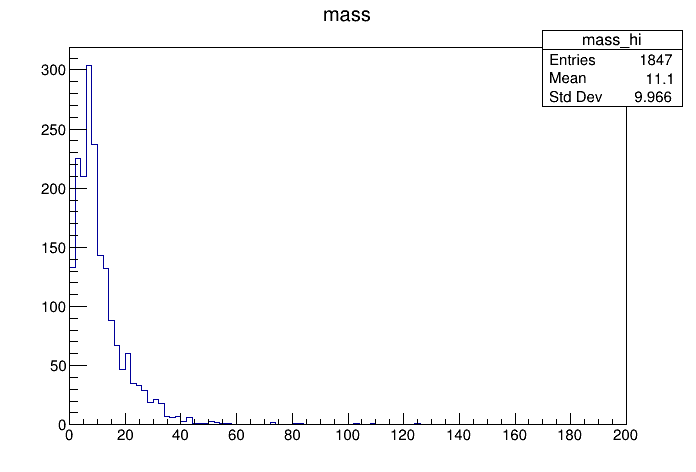

In [4]:
ROOT.EnableImplicitMT(4)
#rdf = ROOT.RDataFrame("Events", "root://cms-xrd-global.cern.ch/"+files[0])
rdf = ROOT.RDataFrame("Events", "root://eoscms.cern.ch//eos/cms"+files[0])
init()
n0 = rdf.Count()
proc_rdf = defineAnalysis(rdf)
histos = definePlots(proc_rdf)
n1 = proc_rdf.Count()
ROOT.RDF.RunGraphs(histos)

print("Selected %s events out of %s" % (n1.GetValue(), n0.GetValue()))
canvases = []
for item in histos:
    histo = item.GetValue()
    c1 = ROOT.TCanvas("c1_"+histo.GetName(), "c1_"+histo.GetName())
    histo.Draw()
    c1.Draw()
    canvases.append(c1)

Selected 39843 events out of 50214528


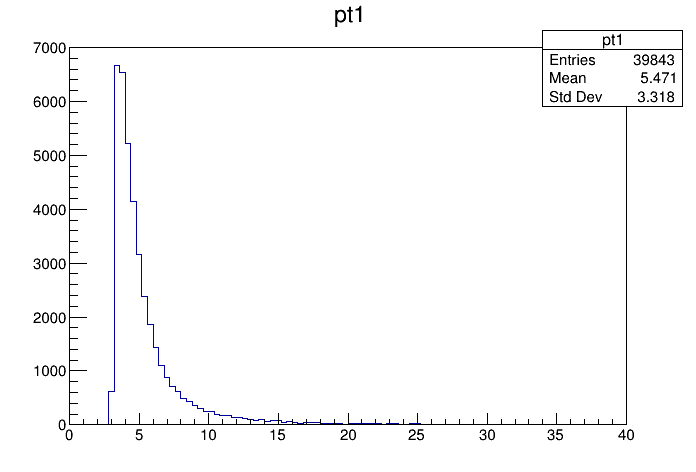

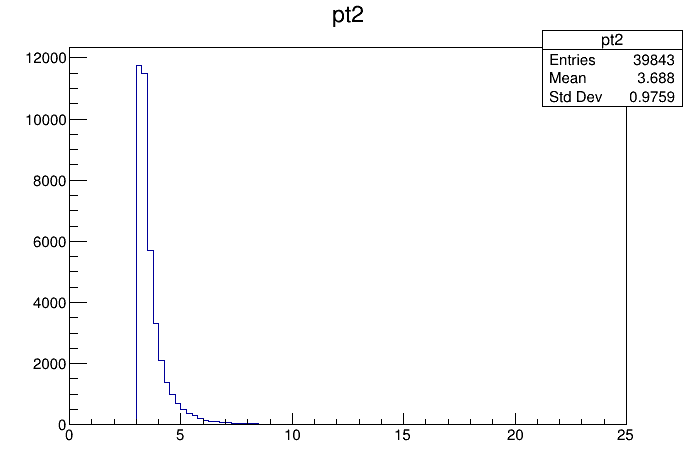

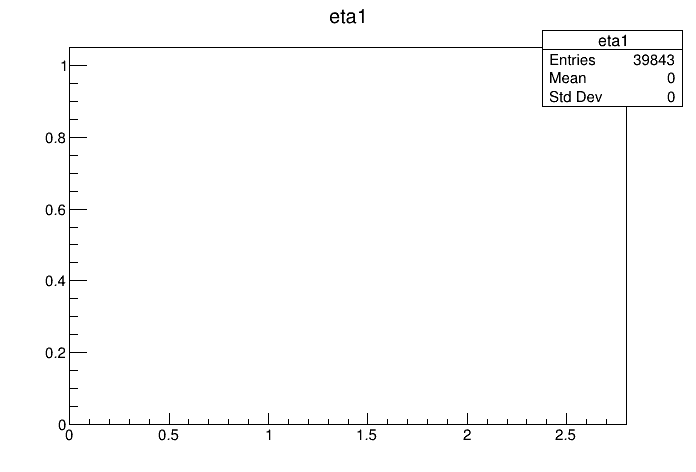

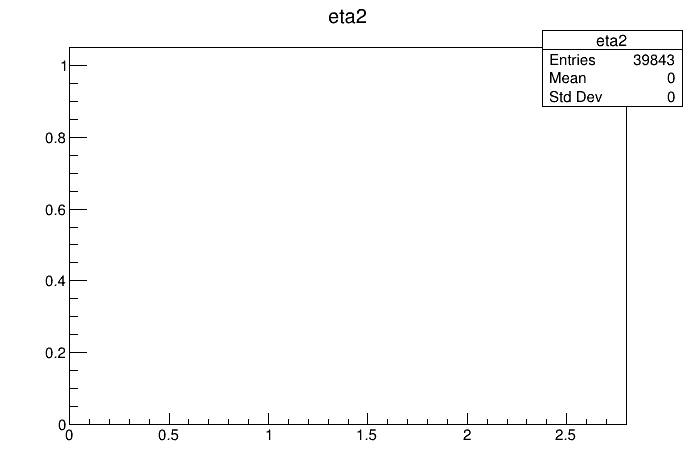

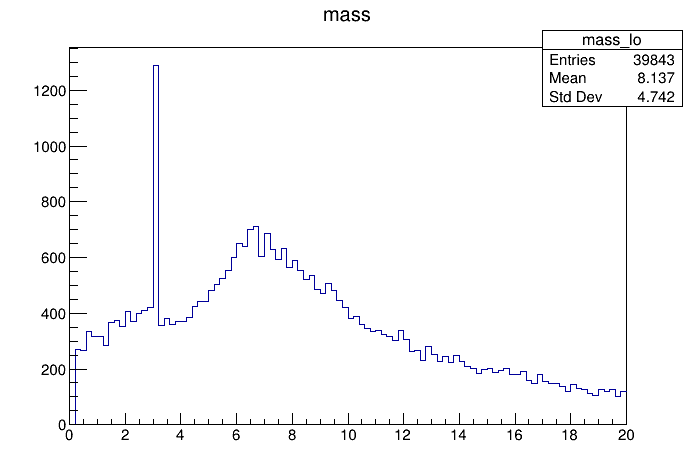

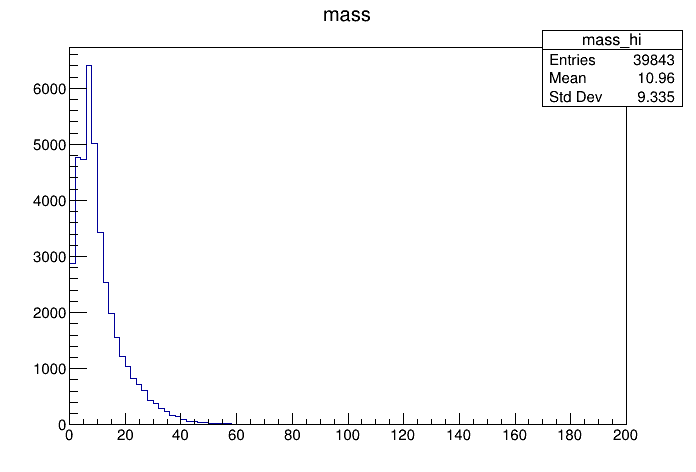

In [5]:
ROOT.EnableImplicitMT(4)
#rdf = ROOT.RDataFrame("Events", "root://cms-xrd-global.cern.ch/"+files[0])
rdf = ROOT.RDataFrame("Events", ["root://eoscms.cern.ch//eos/cms"+f for f in files])
init()
n0 = rdf.Count()
proc_rdf = defineAnalysis(rdf)
histos = definePlots(proc_rdf)
n1 = proc_rdf.Count()
ROOT.RDF.RunGraphs(histos)

print("Selected %s events out of %s" % (n1.GetValue(), n0.GetValue()))
canvases = []
for item in histos:
    histo = item.GetValue()
    c1 = ROOT.TCanvas("c1_"+histo.GetName(), "c1_"+histo.GetName())
    histo.Draw()
    c1.Draw()
    canvases.append(c1)